In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
path = 'F:\\Code\\jupyter_notebook\\超导体\\Dataset\\train.csv'
path1 = 'F:\\Code\\jupyter_notebook\\超导体\\Dataset\\unique_m.csv'
dataSet1 = pd.read_csv(path)
dataSet2 = pd.read_csv(path1).drop(['critical_temp', 'material'], axis = 1)

dataFrame = pd.concat([dataSet1, dataSet2], axis = 1)

dataFrame.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [3]:
# 删除一切相关联的特征,进行抽象
correlationMatrix = dataFrame.corr()
correlationFeatures = set()

for i in range(len(correlationMatrix)) :
    for j in range(i) :
        if abs(correlationMatrix.iloc[i, j]) > 0.75 :
            colname = correlationMatrix.columns[i]
            if colname != "critical_temp" :
                correlationFeatures.add(colname)
dataFrame.drop(correlationFeatures, axis = 1, inplace = True)
dataFrame.head(5)

,number_of_elements,mean_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,mean_fie,wtd_mean_fie,wtd_range_fie,mean_atomic_radius,wtd_range_atomic_radius,range_Density,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,122.90607,31.794921,775.425,1010.268571,735.985714,160.25,42.914286,8958.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,122.90607,36.161939,766.440,1010.612857,743.164286,161.20,50.571429,10488.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,122.90607,35.741099,775.425,1010.820000,743.164286,160.25,49.314286,8958.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,122.90607,33.768010,775.425,1010.544286,739.575000,160.25,46.114286,8958.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,122.90607,27.848743,775.425,1009.717143,728.807143,160.25,36.514286,8958.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [4]:
# 把方差低的特征剔除
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold = 0.1)
selector.fit(dataFrame)
dataFrame = pd.DataFrame(selector.transform(dataFrame), columns = dataFrame.columns[selector.get_support()])
dataFrame.shape


(21263, 63)

In [5]:
dataFrame.to_csv('CleanData.csv')

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df = pd.read_csv('CleanData.csv')
x = df.drop('critical_temp', axis = 1)
x_scale = sc.fit_transform(x)
x = pd.DataFrame(x_scale, columns = x.columns)
y = df['critical_temp']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

# 改变树的数量后观察模型的灵敏度
forest = RandomForestRegressor(n_estimators=200, max_features='auto')
forest.fit(x_train, y_train)

y_prediction = pd.Series(forest.predict(x_test))

# 评价
# 4是四位有效数字
min_rmse = round(np.sqrt(mean_squared_error(y_test, y_prediction)), 4)
r2 = round(r2_score(y_prediction, y_test), 4)

print(r2)
print(min_rmse)

0.9244
8.9673


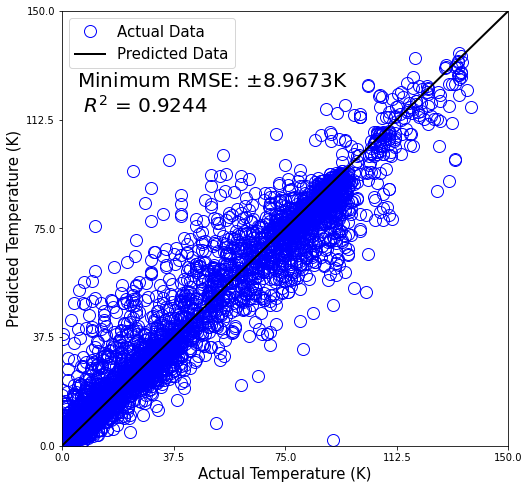

In [7]:
plt.figure(1, figsize=(8, 8))
plt.plot(y_test, y_prediction, 'bo', markersize = 12, mfc = 'none')
plt.plot([0, 150], [0, 150], 'k', linewidth = 2)
plt.xlabel('Actual Temperature (K)', fontsize = 15)
plt.ylabel('Predicted Temperature (K)', fontsize = 15)
plt.xlim((0, 150))
plt.ylim((0, 150))
ticks = np.linspace(0, 150, 5)
text = r'$\pm' + str(min_rmse) + '$' + 'K \n $R^2$ = ' + str(r2)
plt.text(5, 115, 'Minimum RMSE: ' + text, fontsize = 20)
plt.xticks(ticks)
plt.yticks(ticks)
plt.legend(['Actual Data', 'Predicted Data'], loc = 'best', fontsize = 15)

In [ ]:
#  聚类分析
from scipy.cluster.hierarchy import dendrogram, linkage

# z=linkage (y)
# 表示用最短距离法创建系统聚类树
# z-linkage(y," complete' )
# 表示用最长距离法创建系统聚类树
# zlinkage6y." average')
# 表示用平均距离法创建系统聚类树
# zlinkage (v,' centroid' )
# 表示用重心距离法创建系统聚类树
# z-linkage (v,' ward')
# 表示用平方和递增法创建系统聚类树
Z = linkage(df, 'ward')
# Z = linkage(df)

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(df))
# c
print(c)
print(coph_dists)

In [ ]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize = (25, 10))
# plt.title("Hierarchical Clustering Dendrogram")
plt.title("层次聚类系统树图")
plt.xlabel('样本指标')
plt.ylabel('距离')
dendrogram (
    Z,
    leaf_rotation=90., 
    leaf_font_size=8., 
)
plt.savefig('层次聚类系统树图1')
plt.show()

# ?????????????
plt.ylabel('distance')
dendrogram (
    Z,
    leaf_rotation= 90.,
    leaf_font_size= 8.,
)
plt.savefig('层次聚类系统树图2')
plt.show()